# Python Exercises

#### Written for the QuantEcon Indian Summer Workshop (August 2022)
#### Author: [John Stachurski](http://johnstachurski.net/)

In [1]:
%matplotlib inline

Before you attempt these exercises, we recommend that you read

1. the [lecture on NumPy](https://python-programming.quantecon.org/numpy.html),
2. the [lecture on MatPlotLib](https://python-programming.quantecon.org/matplotlib.html) and
3. the [lecture on SciPy](https://python-programming.quantecon.org/scipy.html).


## Exercises

### Exercise 1

Simulate and plot the correlated time series

$$
    x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
    \quad \text{where} \quad
    x_0 = 0 
    \quad \text{and} \quad t = 0,\ldots,T
$$

Here $\{\epsilon_t\}$ is iid and standard normal.

In your solution, restrict your import statements to

In [2]:
from random import normalvariate
import matplotlib.pyplot as plt

Set $T=200$ and $\alpha = 0.9$

### Solution

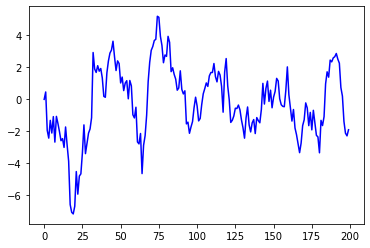

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import normalvariate

alpha = 0.9
ts_length = 200
x = 0

x_values = []
for i in range(ts_length):
    x_values.append(x)
    x = alpha * x + normalvariate(0, 1)
plt.plot(x_values, 'b-')
plt.show()

### Exercise 2

Generate 10000 data points from the [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) with density

$$
f(x; \alpha) = \alpha \exp(-\alpha x)
\qquad
(x > 0, \alpha > 0)
$$

taking $\alpha = 0.5$. Then

1. Plot a histogram of your sample and compare it to the density of the exponential distribution.
2. After looking up the maximum likelihood estimator of $\alpha$, compute the estimate given your data and check that it is in fact close to $\alpha$.

### Solution

After checking [the docs for the exponential distribution](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html) we proceed as follows

In [4]:
from scipy.stats import expon
import numpy as np

alpha = 0.5
n = int(1e5)
ep = expon(scale=1.0/alpha)  # scale controls the exponential parameter
x = ep.rvs(n)

Here's a histogram and density.

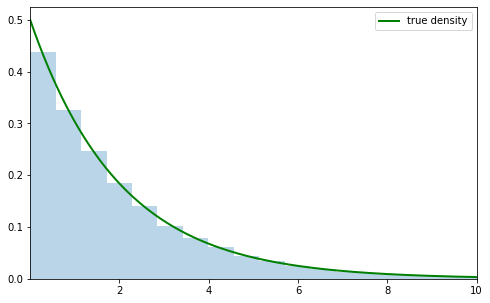

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
xmin, xmax = 0.001, 10.0
ax.set_xlim(xmin, xmax)
ax.hist(x, density=True, bins=40, alpha=0.3)
grid = np.linspace(xmin, xmax, 200)
ax.plot(grid, ep.pdf(grid), 'g-', lw=2, label='true density')
ax.legend()
plt.show()

It's [well-known](http://en.wikipedia.org/wiki/Exponential_distribution) that the MLE of $\alpha$ is $1/\bar x$ where $\bar x$ is the mean of the sample.  Let's check that it is indeed close to $\alpha$.

In [6]:
alpha_mle = 1.0 / x.mean()
print(f"max likelihood estimate of alpha is {alpha_mle}.")

max likelihood estimate of alpha is 0.5003327408675776.


### Exercise 3

Using the same data set, implement maximum likelihood again, but this time pretending that you don't know the analytical expression for the maximum likelihood estimator.  Instead, set up the log likelihood function and maximize it numerically using a routine from `scipy.optimize`. (Have a look at the optimization examples from the scientific Python quickstart notebook.)

### Solution

First let's set up the log likelihood function.

In [7]:
s = x.sum()
def neg_loglike(a):
    return - n * np.log(a) + a * s

This function is minus the log likelihood function for the exponential distribution.

Minimize over a reasonable parameter space

In [8]:
from scipy.optimize import fminbound
fminbound(neg_loglike, 0.01, 10.0)

0.5003313961728263

This is close to the analytical value of the max likelihood estimator we got in exercise 2.

### Exercise 4

Recall that a discrete Lyapunov equation is a matrix equation of the form


\begin{equation}
    X = A X A' + M
\end{equation}


Here all matrices are $n \times n$ and $X$ is the unknown.  $A'$ is the transpose of $A$.  The equation has a unique solution if the spectral radius of $A$ is less than 1.

There is a solver for Lyapunov equations in SciPy.  Let's try it out with these matrices:

In [10]:
import numpy as np
A = np.array([[0, 1],[-1/2, -1]])
M = np.array([[0, 0], [0, 9]])

In [11]:
A

array([[ 0. ,  1. ],
       [-0.5, -1. ]])

In [12]:
M

array([[0, 0],
       [0, 9]])

Here's the solver and the solution.

In [13]:
from scipy.linalg import solve_discrete_lyapunov
solve_discrete_lyapunov(A, M)

array([[ 21.6, -14.4],
       [-14.4,  21.6]])

In fact it's possible to obtain this solution by iteration, starting with a guess $X_0$, such as $X_0 = M$, and then iterating on

$$
    X_{n+1} = A X_n A' + M
$$

Try to obtain the same solution using an iterative scheme.  (That is, start with $X_0$, then compute $X_1$, then $X_2$, etc.  You can stop when $X_{n+1}$ and $X_n$ are close, or by using some other simpler method.  But check that you get a result close to the solution above.)

### Solution

Here's an iterative algorithm that computes the solution.

In [14]:
P = M 
tol = 1e-6
max_iter = 500
current_iter = 0 
error = tol + 1 

while current_iter < max_iter and error > tol:
    P_new = A @ P @ A.T + M 
    error = np.linalg.norm(P - P_new, ord=2)
    P = P_new
    current_iter += 1

print(P)

[[ 21.59999871 -14.39999914]
 [-14.39999914  21.59999925]]


This is close to what we had before:

In [16]:
solve_discrete_lyapunov(A, M)

array([[ 21.6, -14.4],
       [-14.4,  21.6]])